# Implementation of Sigmoid Neurons

## Sigmoid Function is

# $S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [3]:
#importing libaries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings("ignore")


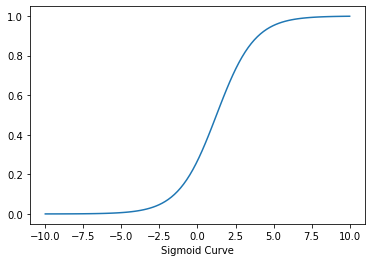

In [4]:
#defining sigmoid function
def sigmoid(x, w, b):
    return 1 /(1 + np.exp(-(w*x + b)))

w = 0.8 #@param {type :"slider", min:-2, max:2, step:0.1}
b = -1
#linspace function generate a linear sequence number
# inside linspace function there have 3 parameters one is starting point, 2nd is end point, 3rd is number of points
#here my starting number is -10 to 10 and number of points is 100
X = np.linspace(-10, 10, 100)
y = sigmoid(X, w, b)

plt.plot(X,y)
plt.xlabel("Sigmoid Curve")
plt.show()

## Sigmoid 3d Plotting

In [5]:
#defing singmoid function for 2d space
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1+ np.exp(-(w1*x1 + w2*x2 + b)))

In [64]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1,X2)
w1 = 0.9
w2 = 0.9
b  = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [65]:
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


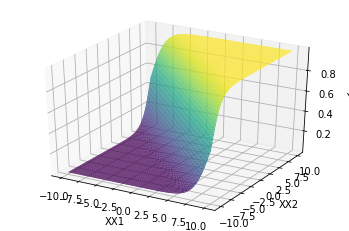

In [66]:
# reference https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('XX1')
ax.set_ylabel('XX2')
ax.set_zlabel('Y');

# Compute Loss 

In [16]:
def sigmoid_loss(X, Y, w_x,b_x):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(x,w_x,b_x)) ** 2
    return loss

In [19]:
W = 0.2
b = -1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

loss = sigmoid_loss(X, Y, W, b)
print("loss is",loss)

loss is 6.774069662390474


In [28]:
loss = []
for i in range(100):
    var = sigmoid_loss(X, Y, W, b)
    loss.append(var)
print("Total Loss",np.sum(loss)/100)   

Total Loss 6.774069662390475


In [46]:
W = np.linspace(0,10,100)
B = np.linspace(0,10,100)

#use to make a grid of two vector in a same dimention
WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = sigmoid_loss(X,Y, WW[i,j], BB[i,j])

In [60]:
Loss.mean()

9.813284153147126

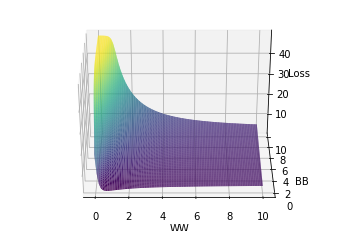

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('WW')
ax.set_ylabel('BB')
ax.set_zlabel('Loss');
ax.view_init(30,270)

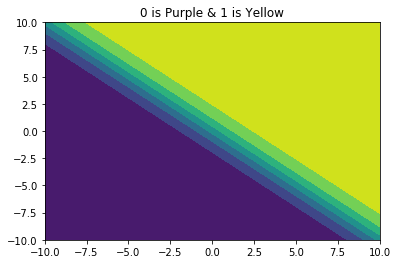

In [69]:
#another plotting for visualization

plt.contourf(X1,X2,Y)
plt.title("0 is Purple & 1 is Yellow")
plt.show()